# **Data Science in Golf: Strokes Gained vs Traditional Metrics - Model Building**

--------------------------------
### **Context** 
-------------------------------
Golf is a great example of how data science can provide valuable insight. Golf is a sport steeped in tradition and has been traditionally evaluated using metrics like scoring average, fairways hit, and greens in regulation. However, these traditional metrics have limitations and may not provide a complete picture of a player's skill. Data science and analytics, specifically the use of Strokes Gained, can help to overcome these limitations by providing a more accurate and comprehensive assessment of a player's performance. 

The use of a normalized set of metrics allows for better comparison across different courses and fields, and can help identify areas for improvement. 

Additionally, there are misconceptions about the game of golf on what skills result in shooting lower scores and winning tournaments, but by using data science and Strokes Gained, it is possible to dispel those misconceptions and focus on facts and facts-based analysis, which can lead to better performance and ultimately better results. 

#### **Strokes Gained**

Strokes Gained (often called the Moneyball of golf) is a relatively new metric in golf that aims to measure a player's performance relative to the rest of the field. It does this by comparing a player's performance on a given hole or round to the expected performance of an "average" golfer. 

Traditional golf metrics, such as scoring average, fairways hit, and greens in regulation, do not take into account the difficulty of the course or the level of competition. Additionally many of these metrics were popularized because they sound good, but often they provide limited insight or in some cases act as misleading metrics. In the example of fairways hit in regulation, this metric does not take into account distance left to the hole. In these cases a shot 10 yards from the hole in the rough would be ranked lower than a shot 300 yards+ from the hole in the fairway, which is clearly counter to what it should be. 

Strokes Gained, on the other hand, uses data from thousands of rounds to calculate the expected performance on each hole and then compares a player's actual performance to that expectation. This allows for a more accurate assessment of a player's skill and can help identify areas where they need to improve.

----------------------------
### **Objective**
-----------------------------
The objective of this project is to analyze data from the 2010 to 2018 PGA tour season using various metrics, including Strokes Gained, to gain insight into the performance of professional golfers. The specific objectives of this project are as follows:

* Draw insight from data from the 2010 to 2018 PGA tour season.
    * Which features lead to the greatest success in golf? Specifically compare how strokes gained stats compare to the traditional stats. 
     * Investigate if the traditional view that short game (putting and chipping) is more valuable than long game skills (driving and approach shots)?
    * Investigate if the traditional view that driving accuracy (fairways hit %) is more valuable than driving distance?
* Determine a the best predictive feature to measure "sucess" in golf,
* Build a prediction model for "success" in golf based on based on that feature.
* Compare the effectiveness of the Strokes Gained metrics to traditional metrics in predicting success by conducting feature analysis on the impact of different metrics. 

Overall, the goal of this project is to use data science to gain a better understanding of golf performance and to identify areas for improvement. By analyzing data from the PGA tour, this project will provide insights that can be used to improve the performance of golfers at all levels.

--------------------------
### **Data Description**
--------------------------
Dataset contains PGA Tour Data from 2010 to 2018 seasons (special note data is pre-covid season 2020). 

**Name the target variable - Looks like wins and top 10 might be out for the small sample size. Fedex cup might be out as well because of the fedex cup weekend? Money might be out as it looks like there might be a lot of nulls for some reason?**

* `Player Name` - Name of the player
* `Rounds` - Number of rounds they played during that specific season
* `Fairway Percentage` - Percentage of Fairways hit off the tee. 
* `Year` - Season played. Because multiple seasons where recored there will be duplicates in column `Player Names` that represent the different seasons they recorded these stats.  
* `Avg Distance`- Average **driving** distance
* `gir`- Greens hit in regulation
* `Average Putts`- Average puts in a round (18 holes)
* `Average Scrambling`- Measure of a golfers performance when they miss the green in regulation. Value is a percentage of how likely they are able to save par in that instance. 
* `Average Score`- Average number of strokes taken per round, that is a average of all a players scores that season. The number is adjusted by the stroke average (difficulty) of each tournament.
* `Points`- Points on the PGA Tour website refer to a player's standing in the FedEx Cup points race, which is a season-long competition that awards points to players based on their performance in each tournament throughout the season. 
    * Certain tournaments on the PGA Tour award more FedEx Cup points than others. The FedEx Cup points system is designed to award more points to players who compete in tournaments with stronger fields
    * Additionally, tournaments that are part of the FedEx Cup playoffs (The Northern Trust, BMW Championship, Tour Championship) also award more FedEx Cup points than regular season events. The point distribution increases as the playoffs progress and the field gets smaller.
* `Wins` - Total number of wins that season
* `Top 10`- Total number of top 10 placements that season
* `Money`- Total money earned from tournament winnings. 

**Strokes Gained Discription**

Strokes Gained metrics are calculated by comparing the number of strokes a player takes to the number of strokes an average player would take on the same shot. 

Example: In the case where a player has a 16-ft 11-inches putt, which has an average strokes gained of 1.826 (on average players take 1.826 strokes to get it in the hole). If the player putts it to 4ft, which has a average strokes gained of 1.12 and then they then proceeded to putt it in. The calculation is:

* 1.826(SG 1rst putt) -1.12(SG 2nd putt) - 1(putt in) = -0.29 

That player receives a negative 0.29 strokes gained for those putts. That means they performed 0.29 strokes worse than the average player. Compared to if they holed the putt out in 1 shot.

* 1.826(SG 1rst putt) - 1(putt in) = 0.826

The player would receive a postive 0.826 for that putt. That means they performed 0.826 almost an entire stroke better than the average player. A similar calculation can be done for ever shot on the course.  

* `Average SG Putts`- The average strokes gained for all putts hit in a round (calculated as shown above) that is then subtracted by the field average strokes gained to account for the tournament difficulty. The sum of each round is then divided by the number of rounds played. 
* `Average SG Total`- The average strokes gained performed compared to the rest of the field at each tournament. 
* `SG:OTT`- Strokes Gained Off-The-Tee measures a player's performance off the tee (from the tee box) compared to the rest of the field in a given tournament or round. 
* `SG:APR`- Strokes Gained Approach measures a player's performance on approach shots (shots from the fairway or rough, played to the green) compared to the rest of the field in a given tournament or round. 
* `SG:ARG`- Strokes Gained Around-The-Green measures a player's performance on shots played around the green (such as chip shots, pitches, and bunker shots) compared to the rest of the field in a given tournament or round.

-------------------------------
### **Recommendations From EDA** 
-------------------------------
* Average_Score is a good metric that focuses on playing well. It is adjusted for the average score of each tournament, but that should only increase its validity. It is our best option of all predictive features. 
* Dropped a number of irrelevant or potentially biased columns from our analysis, we should repeat this step for the model building phase. Droped Columns include:
    * `Points`, `Wins`, `Top_10`, and `Money` - potential predictive features that would not perform as well as `Average_Score`.
    * `Player_Name`, `Year` - irrelevant features.
    * `Rounds` - irrelevant to performance stats, but could biase the data as better players tend to play fewer tournaments. 
    * Kept `Average_SG_Total` for analysis but should drop from model analysis as it too tightly correlated with `Average_Score`. While it would prove valuable as a predictive feature, it would prevent us from seeing which component features of strokes gained are more critical. 

## **Importing Data**

### **Import the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor #Used for a decision tree with a continuouse dependent variable

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor #Used for a random forest with a continuouse dependent variable

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [3]:
hm=pd.read_csv("pgaTourData.csv")

In [4]:
data=hm.copy()

#### Formate the column names to have _ instead of spaces

In [5]:
# replace spaces with underscores in column names
for col in data.columns:
    data.rename(columns={col: col.replace(" ", "_")}, inplace=True)

print(data.columns)

Index(['Player_Name', 'Rounds', 'Fairway_Percentage', 'Year', 'Avg_Distance',
       'gir', 'Average_Putts', 'Average_Scrambling', 'Average_Score', 'Points',
       'Wins', 'Top_10', 'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')


#### **Data Overview**

In [6]:
data.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [7]:
data.shape

(2312, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top_10              1458 non-null   float64
 12  Average_SG_Putts    1678 non-null   float64
 13  Average_SG_Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

All features are numerical except for `Player_Name`,`Points` and`Money`. 
* `Points` and`Money` **should be converted into numerical features.

Multiple columns contain NULL values, all features exept: Player_Names and Year. Looks like there are 1678 values that are consitently non-null?

#### **Drop Null Values**
**Attempting to drop NULL rows with the above hypothesis that they are all from the same group**

In [9]:
# Make a copy to check assumption
data_clean = data.copy()

In [10]:
# remove rows with null values in 'Average_SG_Putts' column
data_clean = data_clean.dropna(subset=['Average_SG_Putts'])

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Points              1674 non-null   object 
 10  Wins                283 non-null    float64
 11  Top_10              1353 non-null   float64
 12  Average_SG_Putts    1678 non-null   float64
 13  Average_SG_Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

**Hypothesis was correct** there are 1678 values out of the original 2312 that are not null on a majority of the features. Will use this cleaned data as our dataset moving forward. 
* `Wins` and `Top_10` still contain a majority null, it is likely these are players who did not score on these metrics and can likely be changed to 0.
* `Money` has 4 NULL values, we can examine these individually. 

### **Choosing our predictive feature**
The goal of our analysis is to determine which features best predict success in golf, but we have many choices for which feature we can use. 
* We can use `Average_Score`, `Points`, `Wins`, `Top_10`, and `Money`.
* While `Wins` and `Top_10` are great measures of success, so few players achieve them that they would not function as a good predictive feature.
* `Points` seems like a good metric on the surface, but fedex points are not distributed evenly in golf. Some tournaments are weighted more and a small selection of top players are allowed to play in the fedex cup which gives the most points. This all to say perhaps those different weights are balanced, but if we have a better option it would be prudent to use it isntead. 
* `Money` - Is a good overall weight of success on the pga tour, but there are likely mutliple confounding factors involved. 
* `Average_Score` is a great metric that focuses on playing well. It is adjusted for the average score of each tournament, but that should only increase its validity. 

**The best choice for predicitve feature is `Average_Score` the other predictive features will be dropped**

#### **Dropping Collumns**

In [12]:
# drop 'Points', 'Wins', 'Top_10', 'Money' columns
data_clean.drop(columns=['Points', 'Wins', 'Top_10', 'Money'], inplace=True)

In [13]:
data_clean.drop(columns=['Average_SG_Total'], inplace=True)

* Dropping `Player_Name`, `Year` as they have no impact.

* Dropping `Rounds` as it is not a measure of how well golf is played. **It would could skew the data as better players play fewer rounds.**

* Dropping `Average_SG_Total` as we want the individual SG metrics to predict Average Score and `Average_SG_Total` encomposes all those metrics and therefore is to tightly correlated to the prediction target and will dominate the model. 

In [14]:
# drop 'Player_Name', 'Year' and 'Rounds'
data_clean.drop(columns=['Player_Name', 'Year', 'Rounds'], inplace=True)

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fairway_Percentage  1678 non-null   float64
 1   Avg_Distance        1678 non-null   float64
 2   gir                 1678 non-null   float64
 3   Average_Putts       1678 non-null   float64
 4   Average_Scrambling  1678 non-null   float64
 5   Average_Score       1678 non-null   float64
 6   Average_SG_Putts    1678 non-null   float64
 7   SG:OTT              1678 non-null   float64
 8   SG:APR              1678 non-null   float64
 9   SG:ARG              1678 non-null   float64
dtypes: float64(10)
memory usage: 144.2 KB


The remaining data is are numerical therefore we no longer need to convert any features.

## **Data Preparation**

### **Separating the target variable from other variables**

In [16]:
# Drop the dependent variable `Average_Score` from the dataframe and create the X(independent variable) matrix

X = data_clean.drop(columns = 'Average_Score') #make a copy called X which is a dataframe with "Average_Score" removed

# Create y(dependent varibale)
Y = data_clean['Average_Score'] #Y is a series (column) containing the "Average_Score" label data

### **Splitting the data into 70% train and 30% test set**

In [17]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## **Model Building**

### **Basic Decision Tree**

In [18]:
# Fit a decision tree regression model to the training data
d_tree_1 = DecisionTreeRegressor()

d_tree_1.fit(x_train, y_train)

DecisionTreeRegressor()

In [19]:
# Evaluate the model on the training data
train_accuracy = d_tree_1.score(x_train, y_train)

print("Train Accuracy: ", train_accuracy)

# Evaluate the model on the test data
test_accuracy = d_tree_1.score(x_test, y_test)

print("Test Accuracy: ", test_accuracy)

Train Accuracy:  1.0
Test Accuracy:  0.6651200125114656


Model is very **overfitted**. Let's try hyperparameter tuning using **GridSearchCV to find the optimal max_depth to reduce overfitting** of the model. We can tune some other hyperparameters as well.

#### Model Results Table

In [20]:
#Create a table 
results = pd.DataFrame(columns = ['Model_Name','Training_Accuracy','Testing_Accuracy'])

results.head()

,Model_Name,Training_Accuracy,Testing_Accuracy


In [38]:
results = results.append({'Model_Name':'d_tree_1',
                          'Training_Accuracy':1.0,
                          'Testing_Accuracy':0.6651200125114656,},
                            ignore_index=True)
results

,Model_Name,Training_Accuracy,Testing_Accuracy
0,d_tree_1,1.0,0.66512


### **Tuned Decision Tree**

In [21]:
# Define the hyperparameter grid to search
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5], #minimum number of samples required to split an internal node
              'min_samples_leaf': [1, 2, 3, 4]} #minimum number of samples to be a leaf node

# Fit a decision tree regression model to the training data using GridSearchCV
d_tree_2 = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
d_tree_2.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", d_tree_2.best_params_)

Best Hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [22]:
# Evaluate the model on the training data
train_accuracy = d_tree_2.score(x_train, y_train)

print("Training Accuracy: ", train_accuracy)

# Evaluate the model on the test data
test_accuracy = d_tree_2.score(x_test, y_test)

print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.898391519589668
Test Accuracy:  0.6825467642802832


#### Model Results Table

In [39]:
results = results.append({'Model_Name':'d_tree_2',
                          'Training_Accuracy':0.898391519589668,
                          'Testing_Accuracy':0.6825467642802832,},
                            ignore_index=True)
results

,Model_Name,Training_Accuracy,Testing_Accuracy
0,d_tree_1,1.0,0.66512
1,d_tree_2,0.898392,0.682547


**Observations**
* Tuned Decision Tree is has reduced overall overfitting
* The model is still performing ~20% better on the training data and only scoring an overall accuracy of 68%

Will perform visualization on the tree to gain insight, but will try an **random forest** model to see if it performs better. 

#### **Visualize The Tree**

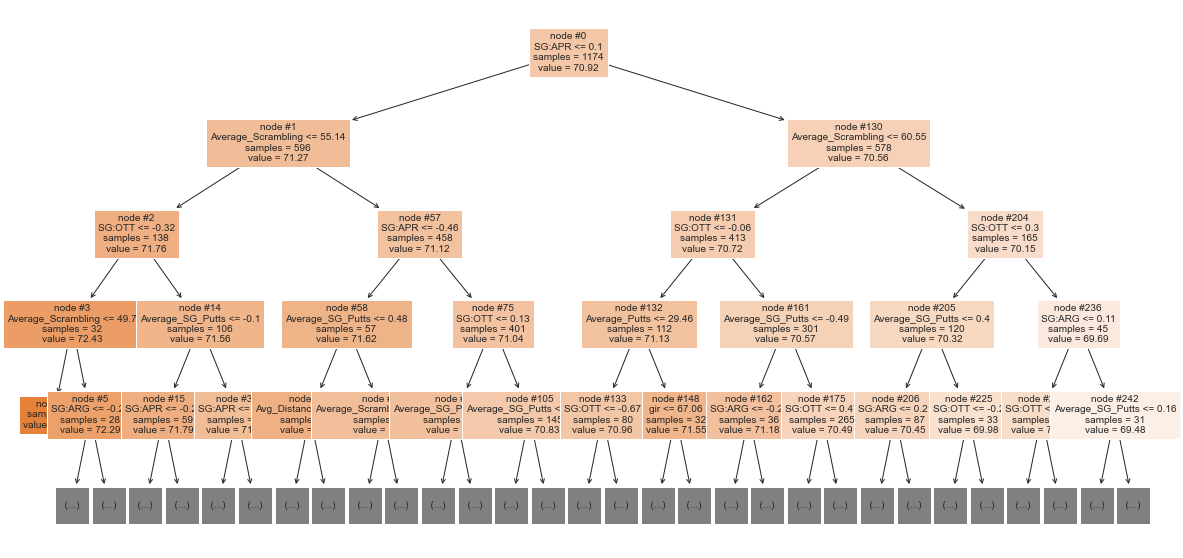

In [23]:
# Fit the best decision tree model found by GridSearchCV
d_tree_best = d_tree_2.best_estimator_
d_tree_best.fit(x_train, y_train)

# Plot the decision tree with a maximum depth of 4
plt.figure(figsize=(20,10))
tree.plot_tree(d_tree_best, filled=True, max_depth=4, feature_names=X.columns, fontsize=10, precision=2,
               class_names=['Negative', 'Positive'], node_ids=True, impurity=False, label='all')
plt.show()

#### **Feature Importance**

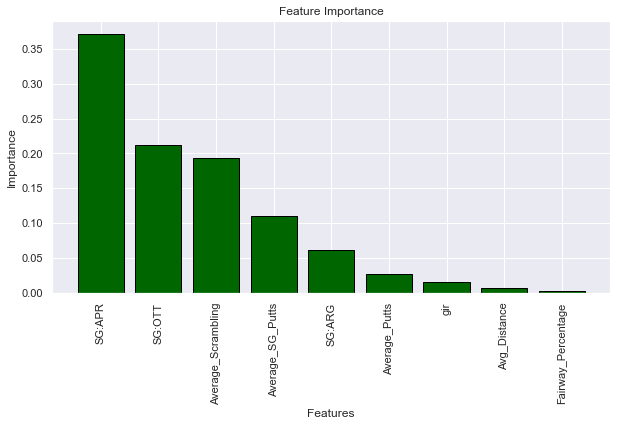

In [24]:
# Get the feature importances
importances = d_tree_best.feature_importances_

# Create an index of the feature importances, in descending order
sorted_index = np.argsort(importances)[::-1]

# Plot the feature importances, using the sorted index
plt.figure(figsize=(10,5))
plt.bar(range(x_train.shape[1]), importances[sorted_index], color='#006600', edgecolor='black')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_index], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

**Observations**
* Feature importance (supported by tree visualization) show that:
    * Strokes Gained Approach is the highest determining feature for golf scores.
    * Strokes Gained Off The Tee and Average Scrambling show significant impact for golf scores.
    * Strokes Gained Putts and Strokes Gained Around The Green show minor impact for golf scores.
    * Average Putts, Greens in regulation, driving distance, and fairway percentages show the minimal impact for golf scores. 
* **This, along with insight drawn from EDA, confirms a number of our objective questions including**:
    * We can see the top predicting features for score, and therefore the skills golfers should prioritize first, are approach shots, tee shots, and then scrambling. 
    * Between the strokes gained metrics and traditional metrics, strokes gained is the clear winner. With all traditional metrics having little to no impact other than average scrambling. 
    * The traditional view that short game is a higher priority than long game is also debunked, with long game metrics holding the top 2 positions. 
    * The hypothesis that fairways percentage is a missleading metric is also confirmed with it holding the lowest ranking position. 

**These insights, along with EDA, answer all our objective questions.** Howerver we should build a more generalized and accuracte model to solidify these claims. 

### **Random Forest Classifier - Base Model**

In [25]:
# Define the parameter grid to search
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Create the random forest regressor model
rf_1 = RandomForestRegressor(random_state=1)

# Create the GridSearchCV object with a 5-fold cross-validation
grid_rf = GridSearchCV(rf_1, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_rf.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best parameters: ", grid_rf.best_params_)

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
# Get the training and testing accuracy
training_accuracy = grid_rf.score(x_train, y_train)
testing_accuracy = grid_rf.score(x_test, y_test)

# Print the training and testing accuracy
print("Training accuracy: ", training_accuracy)
print("Testing accuracy: ", testing_accuracy)

Training accuracy:  0.9796996884358099
Testing accuracy:  0.8590898953534397


In [40]:
results = results.append({'Model_Name':'rf_1',
                          'Training_Accuracy':0.9796996884358099,
                          'Testing_Accuracy':0.8590898953534397,},
                            ignore_index=True)
results

,Model_Name,Training_Accuracy,Testing_Accuracy
0,d_tree_1,1.0,0.66512
1,d_tree_2,0.898392,0.682547
2,rf_1,0.9797,0.85909


**Observations**
* Overall accuracy has improved with the random forest model with a testing accuracy of 86%.
* The model is less overfitted with only a 12% difference. 

**We can try and tune the model to reduce overfitting**

### **Random Forest Classifier - Tuned Model**

In [27]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 500],  # Number of trees in the random forest
    'min_samples_split': [2, 4, 6],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 4, 6],  # Minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [10, 20, 30], # Maximum number of leaf nodes
}


# Create the RandomForestRegressor object
rf_2 = RandomForestRegressor(random_state=1)

# Create the GridSearchCV object
grid_rf_2 = GridSearchCV(estimator=rf_2, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_rf_2.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best parameters: ", grid_rf_2.best_params_)


Best parameters:  {'bootstrap': True, 'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
# Get the training and testing accuracy
training_accuracy = grid_rf_2.score(x_train, y_train)
testing_accuracy = grid_rf_2.score(x_test, y_test)

# Print the training and testing accuracy
print("Training accuracy: ", training_accuracy)
print("Testing accuracy: ", testing_accuracy)

Training accuracy:  0.8688388287495241
Testing accuracy:  0.796666461082127


In [43]:
results = results.append({'Model_Name':'rf_2',
                          'Training_Accuracy':0.8688388287495241,
                          'Testing_Accuracy':0.796666461082127,},
                            ignore_index=True)
results

,Model_Name,Training_Accuracy,Testing_Accuracy
0,d_tree_1,1.0,0.66512
1,d_tree_2,0.898392,0.682547
2,rf_1,0.9797,0.85909
3,rf_2,0.868839,0.796666


Cant reduce the ~10% gap between the training accuraccy and the testing accuracy. Attempted multiple tuning methods to reduce overfitting and all reduced overall accuracy but maintained the gap. This likely means there is little improvement that can be gained from further tuning. The slight overfitting is likely due to the reletively small data size of 1678. Further improvement would have to come from gathering more data. 

* While the overfitted gap has been reduced from 12% to 7% the testing accuracy has fallend by 6%. 
* It is better therefore to **continue forward with rf_1 as it has the greater potntial to generalize well.**

In [44]:
0.868839-0.796666

0.07217300000000004

#### **Feature Importance for rf_1**

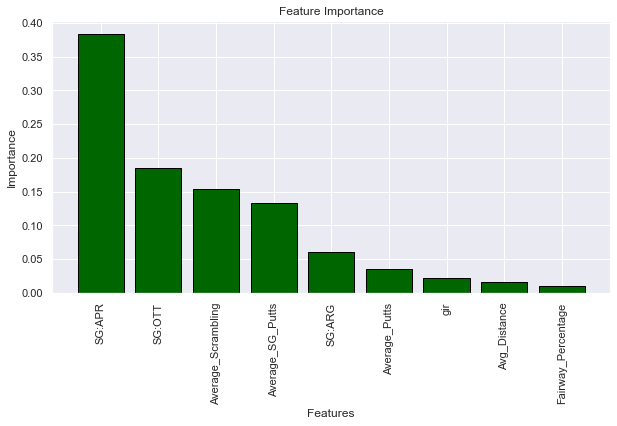

In [46]:
# Fit a RandomForestRegressor object with the best hyperparameters
rf_best = RandomForestRegressor(random_state=1, **grid_rf.best_params_)
rf_best.fit(x_train, y_train)

# Plot the feature importance
importance = rf_best.feature_importances_
sorted_index = importance.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(x_train.shape[1]), importance[sorted_index], color='#006600', edgecolor='black')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_index], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

**Observations**
* Feature importance shows no change from our tuned decision tree model to our random forest model. This supports our above observations.

## **Conclusion and Recommendations**
### **Reminder of Objectives:**
* Build a prediction model for sucess in golf measured by average golf score.
* Determine the most impactfull features that determine a players golf scores.
* Compare the impact of strokes gained stats and traditional stats on a players score.
* Investigate the effect of short game vs long game skills on a players score.
* Investigate the impact of driving accuracy vs driving distance on a players score.

### **Conclusion:**
#### **Model Performance**
We built multiple decision tree based models that can predict average_score, we can see from the table below they generally **performed well** but with varying degrees **overfitted**:

In [47]:
results

,Model_Name,Training_Accuracy,Testing_Accuracy
0,d_tree_1,1.0,0.66512
1,d_tree_2,0.898392,0.682547
2,rf_1,0.9797,0.85909
3,rf_2,0.868839,0.796666


Both the random forest models rf_1 and rf_2 performed well with:
    * rf_1 being overall more accurate
    * rf_2 being slighlty less overfitted
**The best option moving forward for a generalized model is likely rf_1 giving the greater accuracy of 86%.**

#### **Feature Importance**
Feature importance showed that:
   * **Strokes Gained Approach** is the **highest impact** feature for determining a players score.
   * Strokes Gained Off The Tee and Average Scrambling show **significant impact** for a players score.
   * Strokes Gained Putts and Strokes Gained Around The Green show **minor impact** for a players score.
   * Average Putts, Greens in regulation, driving distance, and fairway percentages showed **very little impact** for a players score. 
    
    
This, along with insight drawn from EDA, answers a number of our objective questions:
   * We can see the **top impact features** for a players score, and therefore the **skills golfers should prioritize** first, are **approach shots, tee shots, and then scrambling**.
      * Although it is likely that scrambling only performed better than SG-Putts and SG-Around the green because it is a sudo combination of those to metrics that is biased towards better play. 
  * Between the strokes gained stats and traditional stats, **strokes gained is clearly more impactfull**. With **traditional metrics having little to no impact** other than average scrambling. 
  * The traditional view that short game is a higher priority than long game is also debunked, with **long game metrics holding the top 2 positions**. 
  * The hypothesis that **fairways percentage** is a missleading metric is also confirmed with it holding the **lowest ranking position**.  



### **Recommendations:**
**Model Building**
* While our model performs with a high accuracy of 86% and will likely generalize well, there still **room for improvement in both accuracy and overfitting**. Given the training and testing gap remained even with many itterations of tuning, we speculated these issues are likely coming from having a relatively **small data set of 1,678**. To further improve our model it is recomended:

**Increase our data** set by finding additional data bases to draw from and merge with our current dataset.
  * We can do this by sampling from PGA tour data outside of the 2010 to 2018 seasons
       * However we should perhaps avoid the covid season of 2020-2021 as the data could be biased
  * A better option to increase our data would be to sample from outside of the PGA tour. Not only would this give us more data but a greater range of player skill levels and therefore more diverse data. The best option for this would likely come from the ameture and college golf leagues as the recording of data is held to a high efficacy.

**Applications:**

Beyond the insights derived from our model it also has many practical applications. We can easily use this to predict a players performance given their past years stats, and therefore show players what the impact improvements in each stat would have. 

It should also be noted that while Strokes Gained stats have prooven to be of higher impact, they are not as practical to record as the more traditional stats. However, there is potential to train other models using this data to predict the strokes gained stats using the more traditional stats, specifically:
  * SG Putts could be derived from gir, Average_Putts, and Average_Scrambling.
  * SG ARG could be derived from gir, Average_Putts, and Average_Scrambling.
  * SG-APR could be derived from Avg_Distance, Fairway_Percentage.
  * SG-OTT could be derived from Avg_Distance, Fairway_Percentage.

It would likely take additional features to do this with the needed accuracy but we could then use all the models in combination to take easily measured stats, to predict strokes gained stats, and then average score. For the everyday player this would provide a valuable system that would show them how to best improve at the game. 